<a href="https://colab.research.google.com/github/Fukushimaaa/tutorial/blob/master/embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
def get_prompt(text):
    input_info = {"text":text
                  }
    prompt = prompt_template
    for k,v in input_info.items():
        try:
            prompt = prompt.replace("{"+k+"}",v)
        except:
            print(f"ERROR in replace({k}:{v})")
    return prompt

prompt_template = """

I will provide "Target text", the explanatory text for the slide below. Please organize the information based on the following key points.
Wasteful strings of text should be eliminated as appropriate, and symbols should be interpreted in a clear and understandable manner.
Comprehensively write **all** information for each key point, with no more than five bulleted items. The sentenses should be **written in original language**.

### Key points

- Title
- Content
- Description
- Reference

### Target text

---

{text}

---

# Output Format

---

### Title

{Title of Page}

### Content

{Organize and write down the content in detail}

### Description

{If it exists, please fill in the caption for the figure}

### Reference

{If it exists, please provide a reference}

---

"""


In [1]:
!pip install openai chromadb wget

In [3]:
import openai
import pandas as pd
import os
import wget
from ast import literal_eval

# Chroma's client library for Python
import chromadb

# I've set this to our new embeddings model, this can be changed to the embedding model of your choice
EMBEDDING_MODEL = "text-embedding-ada-002"

# Ignore unclosed SSL socket warnings - optional in case you get these errors
import warnings

warnings.filterwarnings(action="ignore", message="unclosed", category=ResourceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import os
import pandas as pd
import re
import json

# Define the directory path
directory_path = '/content/drive/MyDrive/data/043_005/'

# Initialize an empty list to store the data
data = []

# List all items in the directory
for item in os.listdir(directory_path):
    # Construct the full path of the item
    item_path = os.path.join(directory_path, item)
    # Check if the item is a directory and matches the 'page*' pattern
    if os.path.isdir(item_path) and re.match(r'page\d+', item):
        # Construct the file path for the OCR results
        file_path = os.path.join(item_path, 'ocr_results.json')
        # Check if the OCR results file exists
        if os.path.exists(file_path):
            # Read the JSON file and append to the list
            print(file_path)
            with open(file_path, "r") as f:
              json_data = json.load(f)
            df = pd.DataFrame(json_data, index=['val'])
            data.append(df)
        else:
            print(f"File not found: {file_path}")

# Check if any dataframes have been added
if data:
    # Combine all dataframes into one
    combined_df = pd.concat(data, ignore_index=True)
    # Display the combined dataframe
    print(combined_df)
else:
    print("No JSON files found to concatenate.")



/content/drive/MyDrive/data/043_005/page0/ocr_results.json
/content/drive/MyDrive/data/043_005/page1/ocr_results.json
/content/drive/MyDrive/data/043_005/page2/ocr_results.json
/content/drive/MyDrive/data/043_005/page3/ocr_results.json
/content/drive/MyDrive/data/043_005/page4/ocr_results.json
/content/drive/MyDrive/data/043_005/page5/ocr_results.json
/content/drive/MyDrive/data/043_005/page6/ocr_results.json
/content/drive/MyDrive/data/043_005/page7/ocr_results.json
/content/drive/MyDrive/data/043_005/page8/ocr_results.json
/content/drive/MyDrive/data/043_005/page9/ocr_results.json
/content/drive/MyDrive/data/043_005/page10/ocr_results.json
/content/drive/MyDrive/data/043_005/page11/ocr_results.json
/content/drive/MyDrive/data/043_005/page12/ocr_results.json
/content/drive/MyDrive/data/043_005/page13/ocr_results.json
/content/drive/MyDrive/data/043_005/page14/ocr_results.json
/content/drive/MyDrive/data/043_005/page15/ocr_results.json
/content/drive/MyDrive/data/043_005/page16/ocr_res

In [4]:
display(combined_df)

,title,text_pymupdf,text_lp
0,,2050年カーボンニュートラルの\nシナリオ分析（中間報告）\n(公財)地球環境産業技術研究...,
1,1. 脱炭素化に向けた対策の概要\n,１．脱炭素化に向けた対策の概要\n,
2,,海外再エネ（グリーン水素）の利用（水素、アンモニア、\n合成燃料 (CCU)の輸入）\n余剰...,
3,"出典) 総合資源エネルギー調査会 基本政策分科会, 2020\n ---\n\n” モテナル...",日本の正味ゼロ排出のイメージ（2/2）\n4\n出典）総合資源エネルギー調査会 基本政策分科...,""" モデルでは、非電力部門も含めて全体システムとして分析\n\n"" 発電電力量は、[社会構造..."
4,=デルによって導出されたシナリオは、 想定した前提条件下で、世界全体、時点間で整合的かつ\n...,２. 世界エネルギー・温暖化対策\n評価モデルDNE21+の概要\nモデルによって導出された...,
...,...,...,...
66,,熱電併給システム（CGS）の想定\n67\n2015年\n2030年\n2050年\n産業 ...,注) 表示価格は2000年価格。 米国の消費者物価指数は、2000年を1とすると、2015年...
67,,68\n2015\n2020\n2030\n2050\n在来型内燃自動車\n170\n170...,
68,,大気CO2直接回収（DAC）技術の想定\n69\nエネルギー消費量 （/tCO2）\n設備費...,
69,,70\n投資における主観的割引率の想定\n注１）一人当たりGDPに応じ、地域別・時点別に記載...,注1)一人当たりGDPに応じ、 地域別・時点別に記載の範囲内で想定。 日本は時点に依らず、下...


In [5]:
chroma_client = chromadb.PersistentClient(path="/content/drive/MyDrive/data/043_005/"+"chromadb")


In [6]:
from google.colab import userdata

secret_names = ["AZURE_OPENAI_API_KEY", "OPENAI_API_TYPE", "AZURE_OPENAI_ENDPOINT", "OPENAI_API_VERSION", "BING_SUBSCRIPTION_KEY", "BING_SEARCH_URL"]
for secret_name in secret_names:
    os.environ[secret_name] = userdata.get(secret_name)

In [10]:
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction
from openai import AzureOpenAI

client = AzureOpenAI(
  api_key = os.getenv("AZURE_OPENAI_KEY"),
  api_version = os.getenv("OPENAI_API_VERSION"),
  azure_endpoint =os.getenv("AZURE_OPENAI_ENDPOINT")
)

response = client.embeddings.create(
    input = "Your text string goes here",
    model= "text-embedding-ada-002"
)

#print(response.model_dump_json(indent=2))


In [7]:
def gpt_responce(content: str, system_message: str|None = None,model: str= "gpt-35-turbo", templature=0, max_tokens=800, stream=False, token_usage=False) -> str:
    message_list = []
    if system_message:
        message_list.append({"role": "system","content":system_message})
    message_list.append({"role": "user", "content": content})

    client = AzureOpenAI(api_version="2023-07-01-preview")
    completion = client.chat.completions.create(
        model=model,  # e.g. gpt-35-instant
        messages = message_list,
        temperature=templature,
        max_tokens=max_tokens,
        top_p=0.95,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None,
    )
    response = completion.model_dump()
    reply_text = response.get("choices")[0]["message"]["content"]
    return reply_text


def summarize(text: str, model: str="gpt-35-turbo", templature=0, max_tokens=800, stream=False, token_usage=False) -> str:
    prompt = get_prompt(text=text)
    summalized_text = gpt_responce(content=prompt,
                 model=model,
                 templature=templature)
    return summalized_text


In [11]:
from chromadb import Documents, EmbeddingFunction, Embeddings

class MyEmbeddingFunction(EmbeddingFunction):
  def __init__(self):
    # initialize the embedding function
    self.client = AzureOpenAI(
      api_key = os.getenv("AZURE_OPENAI_KEY"),
      api_version = os.getenv("OPENAI_API_VERSION"),
      azure_endpoint =os.getenv("AZURE_OPENAI_ENDPOINT")
    )

  def __call__(self, input: Documents) -> Embeddings:
    # embed the documents somehow
    response = client.embeddings.create(
        input = input,
        model= "text-embedding-ada-002"
    )
    embeddings = response.model_dump().get("data")[0].get("embedding")
    print(">", end="")
    return embeddings

In [12]:
text_pymupdf = combined_df.iloc[10,1]
response = summarize(text=text_pymupdf, max_tokens=None)
print(text_pymupdf)
print("------\n", response)

DNE21+の前提条件とその想定方法の概要（2/4）
11
部門
想定方法
想定例
補足
化石
燃料
資源量
石油・ガス：米国地質調査所（USGS）、石炭：世界エネルギー会議
（WEC）のレポート（Survey of Energy Resources 1998）ベース
非在来型石油・ガス：H-H. Rogner (1997)論文より想定
世界全体では、
在来型石油
（NGL含む）：
241 Gtoe、在
来型天然ガス：
243 Gtoe、石
炭(褐炭含)：
2576Gtoeなど
価格
採掘コスト：H-H. Rogner (1997)論文。ただし、利権料等が大きいた
め、ベースラインシナリオのFOB価格を、IEA WEO等を参考に利権
料として調整
付録参照
バイ
オマ
ス
残渣系
食料残渣、木材残渣等を国別に推計
2050年時点で
は、世界全体
で9EJ/yr程度
のﾎﾟﾃﾝｼｬﾙ
プラン
テーション
系および
植林ポテ
ンシャル
RITE農業土地利用・水資源評価モデルGLaWで、グリッド別にポテ
ンシャル推計：食料消費量、気候予測等から食料生産性を推計。そ
れらを基に食料生産のための必要土地利用面積を推計、余剰耕地
等を推計。プランテーション系バイオマスポテンシャル（および植林
ポテンシャル）を推計
2050年時点で
は、世界全体
で900 Mha程
度が利用可能
水素
化石燃料由来（グレー水素）、化石燃料＋CCS由来（ブルー水素）、
再エネ由来（グリーン水素）など、各種水素製造技術を想定。排出削
減目標下で費用最小となるようにモデルで内生的に決定される。
長距離水素輸送方法は特に特定していないが、液化水素輸送コス
ト報告例を参考に輸送コストをモデル化
付録参照
メタネーションは、サバティエ反応お
よびSOEC共電解の2種類を想定
合成燃
料(CCU)
石油系合成燃料、合成メタンを想定。合成に必要なCO2は、バイオ
マス、DACに加えて、化石燃料からのCO2も想定。排出削減目標下
で費用最小となる製造方法がモデルで内生的に決定。

------
 ### Title

DNE21+の前提条件とその想定方法の概要（2/4）

### Content

- 部門: 化石燃料
- 想定方法: 米国地質調査所（USGS）の石油・ガス、世界エネルギー会議（WEC）の石炭のレ

全データをGPTで前処理

In [58]:

combined_df["text_summarized"] = combined_df["text_pymupdf"].apply(lambda x: summarize(text=x, max_tokens=None))

In [59]:
combined_df.to_csv("/content/drive/MyDrive/data/043_005/df.csv")

In [29]:
display(combined_df)

,title,text_pymupdf,text_lp,text_summarized
0,,2050年カーボンニュートラルの\nシナリオ分析（中間報告）\n(公財)地球環境産業技術研究...,,### Title\n\n2050年カーボンニュートラルのシナリオ分析（中間報告）\n\n#...
1,1. 脱炭素化に向けた対策の概要\n,１．脱炭素化に向けた対策の概要\n,,### Title\n\n脱炭素化に向けた対策の概要\n\n### Content\n\n-...
2,,海外再エネ（グリーン水素）の利用（水素、アンモニア、\n合成燃料 (CCU)の輸入）\n余剰...,,### Title\n\nJapan's Net Zero Emissions Image ...
3,"出典) 総合資源エネルギー調査会 基本政策分科会, 2020\n ---\n\n” モテナル...",日本の正味ゼロ排出のイメージ（2/2）\n4\n出典）総合資源エネルギー調査会 基本政策分科...,""" モデルでは、非電力部門も含めて全体システムとして分析\n\n"" 発電電力量は、[社会構造...",### Title\n\n日本の正味ゼロ排出のイメージ（2/2）\n\n### Conten...
4,=デルによって導出されたシナリオは、 想定した前提条件下で、世界全体、時点間で整合的かつ\n...,２. 世界エネルギー・温暖化対策\n評価モデルDNE21+の概要\nモデルによって導出された...,,### Title\n\n世界エネルギー・温暖化対策評価モデルDNE21+の概要\n\n##...
...,...,...,...,...
66,,熱電併給システム（CGS）の想定\n67\n2015年\n2030年\n2050年\n産業 ...,注) 表示価格は2000年価格。 米国の消費者物価指数は、2000年を1とすると、2015年...,### Title\n\n熱電併給システム（CGS）の想定\n\n### Content\n...
67,,68\n2015\n2020\n2030\n2050\n在来型内燃自動車\n170\n170...,,### Title\n\nComparison of Vehicle Types and C...
68,,大気CO2直接回収（DAC）技術の想定\n69\nエネルギー消費量 （/tCO2）\n設備費...,,### Title\n\n大気CO2直接回収（DAC）技術の想定\n\n### Conten...
69,,70\n投資における主観的割引率の想定\n注１）一人当たりGDPに応じ、地域別・時点別に記載...,注1)一人当たりGDPに応じ、 地域別・時点別に記載の範囲内で想定。 日本は時点に依らず、下...,### Title\n\nInvestment Assumptions for Subjec...


In [61]:
embedding_function = MyEmbeddingFunction()
print("text_pymupdf")
combined_df["embeddings_text_pymupdf"] = combined_df["text_pymupdf"].apply(embedding_function)
print("text_summarized")
combined_df["embeddings_text_summarized"] = combined_df["text_summarized"].apply(embedding_function)


text_pymupdf
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>text_summarized
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [14]:
#embedding_function = MyEmbeddingFunction()

#content_collection = chroma_client.create_collection(name='page_content', embedding_function=embedding_function)
#title_collection = chroma_client.create_collection(name='page_titles', embedding_function=embedding_function)
#summary_collection = chroma_client.create_collection(name='page_summary', embedding_function=embedding_function)

content_collection = chroma_client.get_collection(name='page_content')
title_collection = chroma_client.get_collection(name='page_titles')
summary_collection = chroma_client.get_collection(name='page_summary')


In [29]:
# Add the content vectors
idx = combined_df.index.tolist()
idx = [str(i) for i in idx]
content_collection.add(
    documents=combined_df["text_pymupdf"].to_list(),
    embeddings=combined_df["embeddings_text_pymupdf"].to_list(),
    ids=idx,
    metadatas=combined_df.loc[:,['title', 'text_pymupdf', 'text_lp']].to_dict(orient="records")
)


In [58]:
summary_collection.add(
    documents=combined_df["text_summarized"].to_list(),
    embeddings=combined_df["embeddings_text_summarized"].to_list(),
    ids=idx,
    metadatas=combined_df.loc[:,['title', 'text_pymupdf', 'text_lp', 'text_summarized']].to_dict(orient="records")
)

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


ベクトル検索

In [19]:
embedding_function = MyEmbeddingFunction()

In [33]:
text_query = "原子力発電コストの試算"
embeddings_query = embedding_function(text_query)
results = summary_collection.query(embeddings_query, n_results=5, include= ["documents", "metadatas", "distances"])

>

In [34]:
for k, res in results.items():
    print(k, res)

ids [['30', '61', '24', '45', '11']]
distances [[0.1759791587398508, 0.25792429947385886, 0.2579782698038731, 0.2594729510965481, 0.268378390306039]]
metadatas [[{'text_lp': '*1 表の数字は、日本の想定値。 世界では国によるロケーションファクターを乗じており、 若干差異をもっ7\n行っている。\n\n*2 モデルの基準年は2000年であるため、2000年価格も表示。2000年価格から2018年価格への換算に\n乗じたもの(米国CPIから) 。\n\n*3 発電電力量当たり費用への換算は、設備利用率859%を用いたもの\n\x0c', 'text_pymupdf': '31\n原子力発電コストの想定\n*1 表の数字は、日本の想定値。世界では国によるロケーションファクターを乗じており、若干差異をもった想定を\n行っている。\n*2 モデルの基準年は2000年であるため、2000年価格も表示。2000年価格から2018年価格への換算は1.46を\n乗じたもの（米国CPIから）。\n*3 発電電力量当たり費用への換算は、設備利用率85%を用いたもの\n設備費用 ($/kW)\n発電単価 ($/MWh)\n2000年価格\n2018年価格\n2000年価格\n2018年価格\n2020年\n2763\n4029\n75\n110\n2030年\n2779\n4053\n76\n111\n2050年\n2794\n4075\n78\n114\n2100年\n2824\n4117\n79\n115\n', 'text_summarized': '### Title\n\n原子力発電コストの想定\n\n### Content\n\n- 表の数字は、日本の想定値。世界では国によるロケーションファクターを乗じており、若干差異をもった想定を行っている。\n- モデルの基準年は2000年であるため、2000年価格も表示。2000年価格から2018年価格への換算は1.46を乗じたもの（米国CPIから）。\n- 発電電力量当たり費用への換算は、設備利用率85%を用いたもの。\n- 2020年の設備費用は2763$/kW

GPT前処理あり

page:  30
distance:  0.1759791587398508
### Title

原子力発電コストの想定

### Content

- 表の数字は、日本の想定値。世界では国によるロケーションファクターを乗じており、若干差異をもった想定を行っている。
- モデルの基準年は2000年であるため、2000年価格も表示。2000年価格から2018年価格への換算は1.46を乗じたもの（米国CPIから）。
- 発電電力量当たり費用への換算は、設備利用率85%を用いたもの。
- 2020年の設備費用は2763$/kWであり、発電単価は75$/MWh。
- 2030年の設備費用は2779$/kWであり、発電単価は76$/MWh。
- 2050年の設備費用は2794$/kWであり、発電単価は78$/MWh。
- 2100年の設備費用は2824$/kWであり、発電単価は79$/MWh。

### Description

N/A

### Reference

N/A


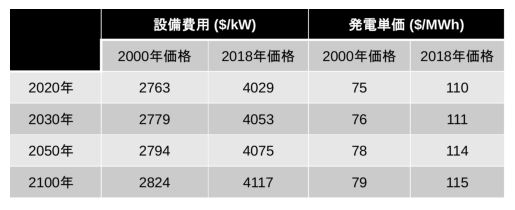

page:  61
distance:  0.25792429947385886
### Title

日本の陸上風力発電コストの想定：時系列

### Content

- 2010年から2050年までの時系列で、日本の陸上風力発電のコストを示している
- コストは$/MWhで表されており、縦軸に表示されている
- 横軸は年を表しており、2010年から2050年までの期間が表示されている
- グラフには4つの異なるシナリオが示されている
- シナリオごとに下限と上限のコストが示されている

### Description

なし

### Reference

なし


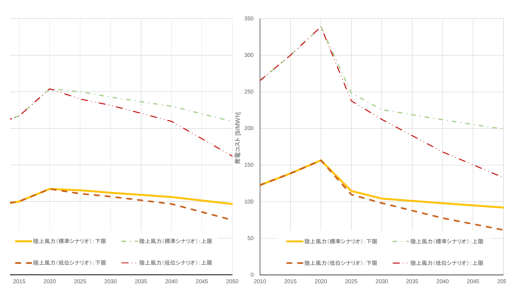

page:  24
distance:  0.2579782698038731
### Title

日本の風力発電コストの想定：時系列

### Content

- 2050年のコスト・ポテンシャル曲線はp.28
- 陸上風力発電
- 洋上風力発電
- 統合費用
- 統合費用の想定はp.30

### Description

- 各時点の導入設備ストックの平均的なコストであり、当該時点に導入される新規設備に限ったコストを表示ではないことに注意されたい。
- グラデーション部分はあくまでモデル計算のイメージ

### Reference

- p.28, p.30


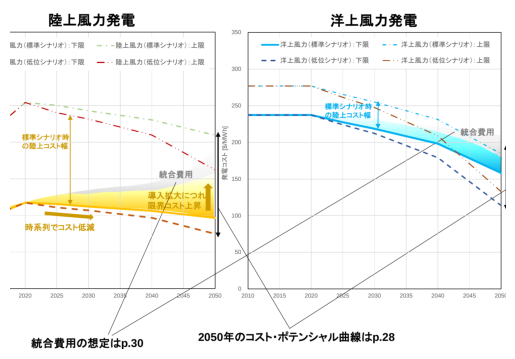

page:  45
distance:  0.2594729510965481
### Title

まとめ（暫定）

### Content

- 総発電: 46兆kWh
- 電力量: 
  - 再エネ: 1.05兆kWh (約100%)
  - 原子力: 0兆kWh
  - 水素: 0兆kWh
  - アンモニア: 0兆kWh
  - CCUS: 0兆kWh
  - 火力: 0兆kWh
- 電源構成: 
  - 再エネ: 約100%
  - 原子力: 0%
  - 水素: 0%
  - アンモニア: 0%
  - CCUS: 0%
  - 火力: 0%
- 結果からの示唆、結果を実現するための課題:
  - いずれの電源も導入に向けて、技術的、自然的・社会的、経済的な課題を全て乗り越える必要。
  - 様々な課題を乗りこえられることを想定して設定するシナリオ。
  - いずれの電源においても、この水準を達成することは容易ではない水準。

### Description

N/A

### Reference

N/A


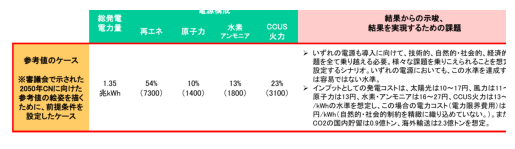

page:  11
distance:  0.268378390306039
### Title

DNE21+の前提条件とその想定方法の概要（3/4）

### Content

- 部門: 発電
- 想定方法: OECD/NEA、コスト等検証委員会等の報告を参考に設備費を想定
- 想定例: 燃料費は、化石燃料の項に記載のFOB価格に、輸送距離を踏まえた輸送費等を考慮しCIF価格として想定
- 補足: 付録参照

- 部門: 原子力
- 想定方法: OECD/NEA、コスト等検証委員会等の報告を参考に設備費を想定
- 補足: 付録参照
- 原子力を導入しないとしている国については経済合理性と無関係に導入無しと制約。日本については、2030年のエネルギーミックスの原子力比率20%とし参考値のケースでは2050年10%を上限値として制約。感度解析実施

- 部門: 再エネ
- 想定方法: 
  - 太陽光：NASAによるGISベースの日射量データと土地利用データから、グリッド別の太陽光ポテンシャルを推計
  - 風力：NOAAによるGISベースの風速データと土地利用データから、グリッド別の太陽光ポテンシャルを推計
  - VREは、別途、総発電電力量に占める比率上昇とともに増加する系統対策費を想定（東大-IEEJ電源構成モデルを援用）
  - 水力：WEC Survey of Energy Resources 1998を基に国別にコスト・ポテンシャルを想定
  - 地熱：各種文献より発電費用172$/MWh～258$/MWhと想定
  - 集中型太陽熱：NASAによるGISベースの日射量データと土地利用データからグリッド別の集中型太陽熱発電ポテンシャルを推計
- 補足: VRE：p.24-30 推計は、世界全体で整合的となるよう、世界地図ベースのGISデータから推計。設備費については外生的に時間とともにコスト低減


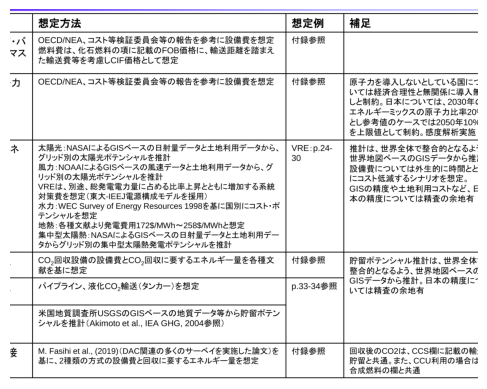

In [35]:
import glob
path = "/content/drive/MyDrive/data/043_005/"
for i in range(len(results["ids"][0])):
  idx = results["ids"][0][i]
  print("page: ", idx)
  print("distance: ", results["distances"][0][i])
  print(results["documents"][0][i])
  for img_path in glob.glob(path+f"page{idx}/*.png"):
    img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')  # 軸を非表示にする
  plt.show()

GPT前処理なし

>page:  30
distance:  0.1719619552609245
31
原子力発電コストの想定
*1 表の数字は、日本の想定値。世界では国によるロケーションファクターを乗じており、若干差異をもった想定を
行っている。
*2 モデルの基準年は2000年であるため、2000年価格も表示。2000年価格から2018年価格への換算は1.46を
乗じたもの（米国CPIから）。
*3 発電電力量当たり費用への換算は、設備利用率85%を用いたもの
設備費用 ($/kW)
発電単価 ($/MWh)
2000年価格
2018年価格
2000年価格
2018年価格
2020年
2763
4029
75
110
2030年
2779
4053
76
111
2050年
2794
4075
78
114
2100年
2824
4117
79
115



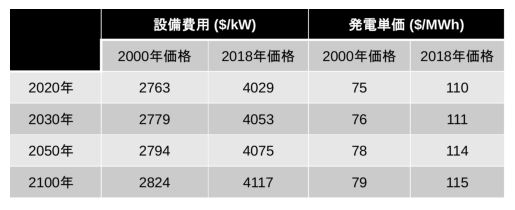

page:  46
distance:  0.18426533046859989
47
まとめ（暫定）
技術イノベーションなど
により、参考値のケース
の前提条件を変更する
ケース
↓
総発電
電力量
電源構成
結果からの示唆、
結果を実現するための課題
再エネ
原子力
水素
アンモニア
CCUS
火力
再エネの価格が飛
躍的に低減する
ケース②
1.5
兆kWh
63%
（9500）
10%
（1500）
2%
（300）
25%
（3800）
 参考値のケースの想定から、新型太陽光や発電効率が大幅に向上し
た風力発電などの開発・商用化などのイノベーションが実現し、太陽光
6～10円、風力8～15円と大幅に低減することを想定。
 参考値のケースに加えて、自然的・社会的を超えて導入が必要。
 再エネのコストが水素を下回るため、水素よりも優先して導入されるシ
ナリオであり、この場合の電力コストは、22.4円/kWh。
原子力の活用が進
むケース③
1.35
兆kWh
53%
（7200）
20%
（2700）
4%
（500）
23%
（3100）
 参考値のケースの想定から、原子力に対する国民理解などが進み、
原子力発電所のリプレース・新増設が行われることを前提に、原子力
が2割を上限に電源構成を賄うことを想定したシナリオ。
 この場合の電力コストは、24.1円/kWhとなる。
 仮に原子力の上限を5割に設定した場合の電力コストは、19.5円/kWh
となる。
水素・アンモニアの
価格が飛躍的に低
減するケース④
1.35
兆kWh
47%
（6300）
10%
（1400）
23%
（3100）
20%
（2700）
 参考値のケースの想定から、更に水素製造（水電解、水素液化設備
費）における技術イノベーションや民間投資の拡大などによる市場拡
大により、水素コストの大幅な低減が実現し、水素の発電コスト13～21
円/kWhとなることを想定。この場合の電力コストは、23.5円/kWhとなる。
 水素供給インフラも参考値のケースで想定したものと同規模のインフラ
整備が追加的に必要となる。
CCUSにおけるCO2
貯留量が飛躍的に
増大するケース⑤
1.35
兆kWh
44%
（5900）
10%
（1400）
10%
（1400）
35%
（4700）

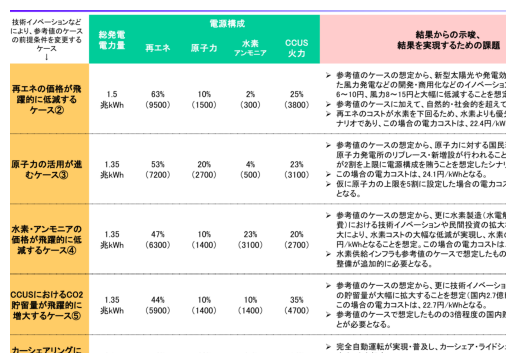

page:  45
distance:  0.2107967935629108
46
まとめ（暫定）
総発電
電力量
電源構成
結果からの示唆、
結果を実現するための課題
再エネ
原子力
水素
アンモニア
CCUS
火力
参考値のケース
※審議会で示された
2050年CNに向けた
参考値の絵姿を描く
ために、前提条件を
設定したケース
1.35
兆kWh
54%
（7300）
10%
（1400）
13%
（1800）
23%
（3100）
 いずれの電源も導入に向けて、技術的、自然的・社会的、経済的な課
題を全て乗り越える必要。様々な課題を乗りこえられることを想定して
設定するシナリオ。いずれの電源においても、この水準を達成すること
は容易ではない水準。
 インプットとしての発電コストは、太陽光は10～17円、風力は11～20円、
原子力は13円、水素・アンモニアは16～27円、CCUS火力は13～16円
/kWhの水準を想定し、この場合の電力コスト（電力限界費用）は、24.9
円/kWh（自然的・社会的制約を精緻に織り込めていない。）。また、
CO2の国内貯留は0.9億トン、海外輸送は2.3億トンを想定。
再エネ100％ケース
①
1.05
兆kWh
約100%
0%
0%
0%
 外生的に再エネを約100％で設定した場合のシナリオ。インプットとして
の電力コストは参考値のケースと同様の想定。
 電力コストは、システム統合費用が増加し、53.4円/kWh。他の安価な
電力の選択肢が使えない結果、電力の使用量も減少する。
 更に、再エネ導入量は相当程度の自然的・社会的制約などの課題を
乗り越える必要があり、現実的ではないのではないか。

今回のシナリオ分析における、技術の導入量やコストの前提条件には、日本における自然的・社会的制約を精緻に織り込めておらず、また、
コストは国際機関による価格見通しなどを踏まえて想定したものである点に留意が必要。今後、より詳細なこれらの制約などを考慮した分析
により、より実態に即した将来像を描くことが可能となる。

このため、以下に整理された数値だけをもって、将来に向けた政策対応を判断するべきではなく、数字には表れない様々な制約などを常に
考慮することが重要である。

また、電力限界費用＝電力コスト（送電端における電力

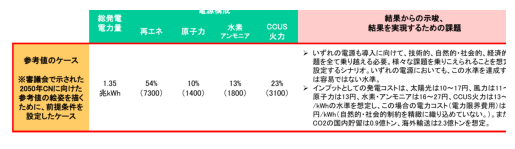

page:  70
distance:  0.21561526396184422
71
【参考】限界削減費用とエネルギーシステム総コストの解説
※ 費用曲線はあくまでイメージ
（実際には技術間の相関などがあり複雑）
[面積にあたるコスト]：
[▲100%のエネルギーシステム総コスト]－
[ベースラインのエネルギーシステム総コス
ト]
エネルギーシステムコ
スト*1
(billion US$/yr)
参考値のケース
1179
―
①再エネ極大
1284
(+106)
②再エネイノベ
1142
(-37)
③原子力活用*2
1166～
1133
(-13～-45)
④水素イノベ
1160
(-19)
⑤CCUS活用
1150
(-29)
⑥カーシェアリン
グにより需要が低
減するケース
909
(-270)
*1：括弧書きの数値は参考値のケースからの変動分
*2：原子力活用シナリオは、原子力比率20%および50%の下での結果



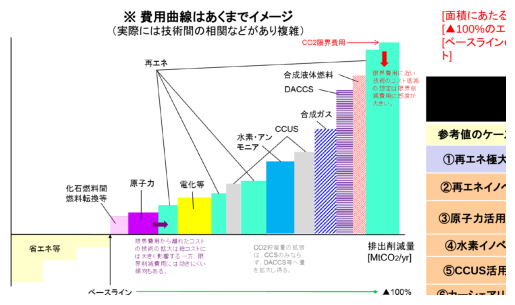

page:  31
distance:  0.21740829825495045
32
【参考】IEA/NEAによる原子力発電コスト見通し
OECD諸国における新設価格は、こ
こ数年は非常に高く、現在のモデル想
定を上回る水準となっているが、
将来的には低減してくると見込まれて
いる。
出典）IEA/NEA, Projected Costs of 
Generating Electricity 2020 



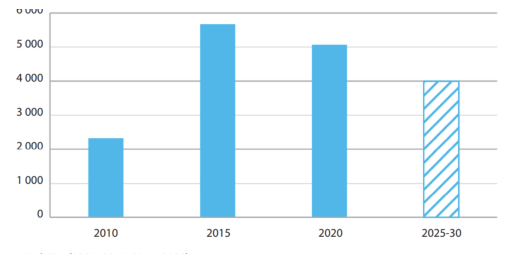

In [36]:
text_query = "原子力発電コストの試算"
embeddings_query = embedding_function(text_query)
results = content_collection.query(embeddings_query, n_results=5, include= ["documents", "metadatas", "distances"])

path = "/content/drive/MyDrive/data/043_005/"
for i in range(len(results["ids"][0])):
  idx = results["ids"][0][i]
  print("page: ", idx)
  print("distance: ", results["distances"][0][i])
  print(results["documents"][0][i])
  for img_path in glob.glob(path+f"page{idx}/*.png"):
    img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')  # 軸を非表示にする
  plt.show()

キーワード検索とのハイブリット

In [38]:
text_query = "原子力発電コストの試算"
keyword = "原子力"
embeddings_query = embedding_function(text_query)
results = summary_collection.query(embeddings_query,
                                   where_document={"$contains":keyword},
                                   n_results=5,
                                   include= ["documents", "metadatas", "distances"])

>

page:  30
distance:  0.1759791587398508
### Title

原子力発電コストの想定

### Content

- 表の数字は、日本の想定値。世界では国によるロケーションファクターを乗じており、若干差異をもった想定を行っている。
- モデルの基準年は2000年であるため、2000年価格も表示。2000年価格から2018年価格への換算は1.46を乗じたもの（米国CPIから）。
- 発電電力量当たり費用への換算は、設備利用率85%を用いたもの。
- 2020年の設備費用は2763$/kWであり、発電単価は75$/MWh。
- 2030年の設備費用は2779$/kWであり、発電単価は76$/MWh。
- 2050年の設備費用は2794$/kWであり、発電単価は78$/MWh。
- 2100年の設備費用は2824$/kWであり、発電単価は79$/MWh。

### Description

N/A

### Reference

N/A


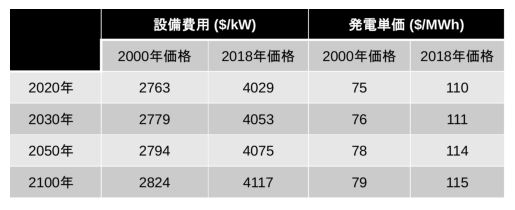

page:  45
distance:  0.2594729510965481
### Title

まとめ（暫定）

### Content

- 総発電: 46兆kWh
- 電力量: 
  - 再エネ: 1.05兆kWh (約100%)
  - 原子力: 0兆kWh
  - 水素: 0兆kWh
  - アンモニア: 0兆kWh
  - CCUS: 0兆kWh
  - 火力: 0兆kWh
- 電源構成: 
  - 再エネ: 約100%
  - 原子力: 0%
  - 水素: 0%
  - アンモニア: 0%
  - CCUS: 0%
  - 火力: 0%
- 結果からの示唆、結果を実現するための課題:
  - いずれの電源も導入に向けて、技術的、自然的・社会的、経済的な課題を全て乗り越える必要。
  - 様々な課題を乗りこえられることを想定して設定するシナリオ。
  - いずれの電源においても、この水準を達成することは容易ではない水準。

### Description

N/A

### Reference

N/A


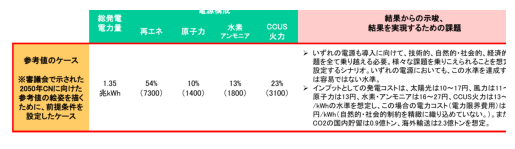

page:  11
distance:  0.268378390306039
### Title

DNE21+の前提条件とその想定方法の概要（3/4）

### Content

- 部門: 発電
- 想定方法: OECD/NEA、コスト等検証委員会等の報告を参考に設備費を想定
- 想定例: 燃料費は、化石燃料の項に記載のFOB価格に、輸送距離を踏まえた輸送費等を考慮しCIF価格として想定
- 補足: 付録参照

- 部門: 原子力
- 想定方法: OECD/NEA、コスト等検証委員会等の報告を参考に設備費を想定
- 補足: 付録参照
- 原子力を導入しないとしている国については経済合理性と無関係に導入無しと制約。日本については、2030年のエネルギーミックスの原子力比率20%とし参考値のケースでは2050年10%を上限値として制約。感度解析実施

- 部門: 再エネ
- 想定方法: 
  - 太陽光：NASAによるGISベースの日射量データと土地利用データから、グリッド別の太陽光ポテンシャルを推計
  - 風力：NOAAによるGISベースの風速データと土地利用データから、グリッド別の太陽光ポテンシャルを推計
  - VREは、別途、総発電電力量に占める比率上昇とともに増加する系統対策費を想定（東大-IEEJ電源構成モデルを援用）
  - 水力：WEC Survey of Energy Resources 1998を基に国別にコスト・ポテンシャルを想定
  - 地熱：各種文献より発電費用172$/MWh～258$/MWhと想定
  - 集中型太陽熱：NASAによるGISベースの日射量データと土地利用データからグリッド別の集中型太陽熱発電ポテンシャルを推計
- 補足: VRE：p.24-30 推計は、世界全体で整合的となるよう、世界地図ベースのGISデータから推計。設備費については外生的に時間とともにコスト低減


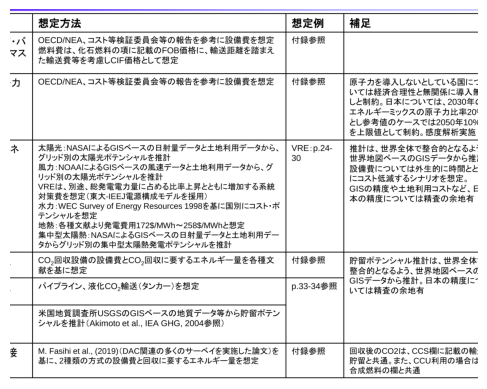

page:  31
distance:  0.28640942406393055
### Title

IEA/NEAによる原子力発電コスト見通し

### Content

- OECD諸国における新設価格は、ここ数年は非常に高く、現在のモデル想定を上回る水準となっている。
- 将来的には低減してくると見込まれている。

### Description

None

### Reference

出典）IEA/NEA, Projected Costs of Generating Electricity 2020


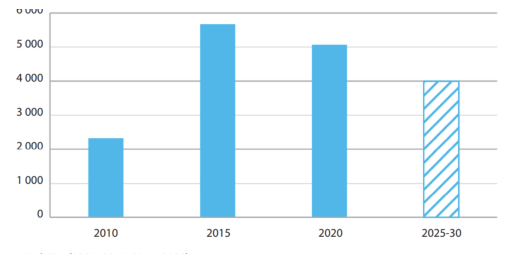

page:  21
distance:  0.2923234200440939
### Title

電源の参考値におけるイノベーションの考え方

### Content

- 2050年の電源の参考値を実現するためには、各電源がそれぞれ大きなハードルを乗り越える必要がある。
- 原子力と化石＋CCUSで3~4割について、原子力の上限を1割と想定した場合、化石＋CCUSで2~3割を満たす必要がある。
- 電力部門以外におけるCCUS必要量も含めて、相当量のCO2貯留を国内外で実現する想定となる。
- 水素・アンモニア・カーボンリサイクル燃料についても、モデル上供給上限は設定せず、大規模輸送を実現するインフラ整備等の実現を想定している。

### Description

- このスライドは、基本政策分科会において提示された、2050年の電源の参考値を実現するために必要なイノベーションの考え方を説明している。
- イノベーションの考え方は、各電源が大きなハードルを乗り越える必要があることを示している。
- 原子力と化石＋CCUSの割合を3~4割とし、原子力の上限を1割と想定した場合、化石＋CCUSで2~3割を満たす必要があることが示されている。
- また、電力部門以外におけるCCUS必要量も含めて、相当量のCO2貯留を国内外で実現する必要があることが述べられている。
- 水素・アンモニア・カーボンリサイクル燃料についても、モデル上供給上限は設定せず、大規模輸送を実現するインフラ整備等の実現を想定していることが説明されている。

### Reference

- 基本政策分科会資料(抜粋) - 令和2年12月21日


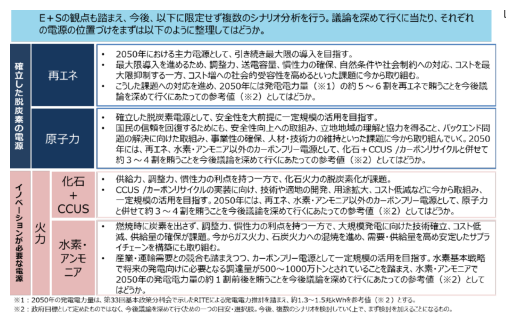

In [39]:

path = "/content/drive/MyDrive/data/043_005/"
for i in range(len(results["ids"][0])):
  idx = results["ids"][0][i]
  print("page: ", idx)
  print("distance: ", results["distances"][0][i])
  print(results["documents"][0][i])
  for img_path in glob.glob(path+f"page{idx}/*.png"):
    img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')  # 軸を非表示にする
  plt.show()

In [82]:
text_query = "2050年CN達成時のエネルギー需給像"
embeddings_query = embedding_function(text_query)
results = summary_collection.query(embeddings_query,
                                   n_results=5,
                                   include= ["documents", "metadatas", "distances"])

>

page:  21
distance:  0.24469620233791167
### Title

電源の参考値におけるイノベーションの考え方

### Content

- 2050年の電源の参考値を実現するためには、各電源がそれぞれ大きなハードルを乗り越える必要がある。
- 原子力と化石＋CCUSで3~4割について、原子力の上限を1割と想定した場合、化石＋CCUSで2~3割を満たす必要がある。
- 電力部門以外におけるCCUS必要量も含めて、相当量のCO2貯留を国内外で実現する想定となる。
- 水素・アンモニア・カーボンリサイクル燃料についても、モデル上供給上限は設定せず、大規模輸送を実現するインフラ整備等の実現を想定している。

### Description

- このスライドは、基本政策分科会において提示された、2050年の電源の参考値を実現するために必要なイノベーションの考え方を説明している。
- イノベーションの考え方は、各電源が大きなハードルを乗り越える必要があることを示している。
- 原子力と化石＋CCUSの割合を3~4割とし、原子力の上限を1割と想定した場合、化石＋CCUSで2~3割を満たす必要があることが示されている。
- また、電力部門以外におけるCCUS必要量も含めて、相当量のCO2貯留を国内外で実現する必要があることが述べられている。
- 水素・アンモニア・カーボンリサイクル燃料についても、モデル上供給上限は設定せず、大規模輸送を実現するインフラ整備等の実現を想定していることが説明されている。

### Reference

- 基本政策分科会資料(抜粋) - 令和2年12月21日


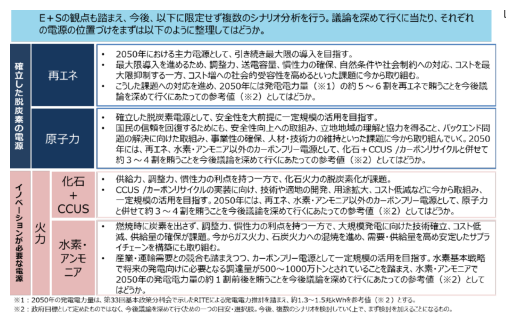

page:  47
distance:  0.26491614035205435
### Title

シナリオ分析の結果からの示唆

### Content

- 非電力部門については、水素還元製鉄やDACCSなどの炭素除去技術やカーボンリサイクル技術は必要不可欠な技術であり、これらの技術を実装できない限り、カーボンニュートラル社会の達成は困難である。
- 2050年カーボンニュートラルに向けては、確立した脱炭素技術のある電力部門の脱炭素化が大前提となる。しかし、電源ごとに課題や制約があり、これらを乗り越える前提条件を設定する必要がある。課題の克服には困難が伴い、電力コストも上昇する見込みである。
- 再エネ電源については、モデル分析上では導入量を増加させることが可能であるが、実際には自然条件や社会制約により、再エネ電源への依存度を高めることは困難であり、再エネ100%のシナリオは現実的ではない。また、再エネ100%にするとコストが大幅に上昇する。
- 技術イノベーションが進展するケースを比較すると、脱炭素電源ごとに課題が克服され、導入が拡大すれば、2050年カーボンニュートラルの実現可能性が高まる。しかし、課題の克服には不確実性が大きい。

### Description

なし

### Reference

なし


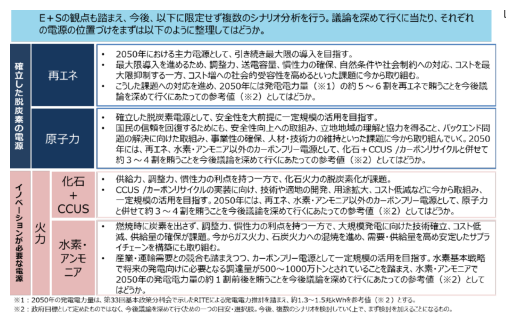

page:  45
distance:  0.26625723682914787
### Title

まとめ（暫定）

### Content

- 総発電: 46兆kWh
- 電力量: 
  - 再エネ: 1.05兆kWh (約100%)
  - 原子力: 0兆kWh
  - 水素: 0兆kWh
  - アンモニア: 0兆kWh
  - CCUS: 0兆kWh
  - 火力: 0兆kWh
- 電源構成: 
  - 再エネ: 約100%
  - 原子力: 0%
  - 水素: 0%
  - アンモニア: 0%
  - CCUS: 0%
  - 火力: 0%
- 結果からの示唆、結果を実現するための課題:
  - いずれの電源も導入に向けて、技術的、自然的・社会的、経済的な課題を全て乗り越える必要。
  - 様々な課題を乗りこえられることを想定して設定するシナリオ。
  - いずれの電源においても、この水準を達成することは容易ではない水準。

### Description

N/A

### Reference

N/A


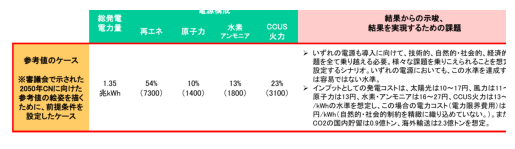

page:  20
distance:  0.267863296026297
### Title

シナリオ想定と再エネ比率 (2050年)

### Content

- シナリオ名: シナリオ想定と再エネ比率 (2050年)
- 再エネコスト: 再エネのコスト
- 原子力比率: 原子力の比率
- 水素コスト: 水素のコスト
- CCUS (貯留ポテンシャル): CCUSの貯留ポテンシャル
- 完全自動運転 (カーライドシェア): 完全自動運転とカーライドシェア
- 電源構成に占める再エネ比率: 電源構成に占める再エネの比率
- 参考値のケース: 参考値のケース
- 標準コスト: 標準のコスト
- 国内貯留: 国内への貯留
- 海外への輸送: 海外への輸送
- 標準想定 (完全自動運転車実現・普及想定せず): 標準の想定 (完全自動運転車実現・普及想定せず)
- 再エネ極大: 再エネの極大
- 再エネイノベ: 再エネのイノベ
- 低位コスト: 低位のコスト
- 原子力活用: 原子力の活用
- 水素イノベ: 水素のイノベ
- CCUS活用: CCUSの活用
- 需要変容: 需要の変容
- 2030年以降完全自動運転実現・普及し、カーライドシェア拡大、自動車台数低減により素材生産量低下: 2030年以降完全自動運転実現・普及し、カーライドシェア拡大、自動車台数低減により素材生産量低下
- DAC無しでは実行可能解が無く、全てのシナリオでDACが利用可能と想定: DAC無しでは実行可能解が無く、全てのシナリオでDACが利用可能と想定
- 原子力活用シナリオは別途、比率50%まで分析を実施: 原子力活用シナリオは別途、比率50%まで分析を実施
- 需要サイドの変化については、カーシェアリング以外の要素も踏まえた更なるシナリオ


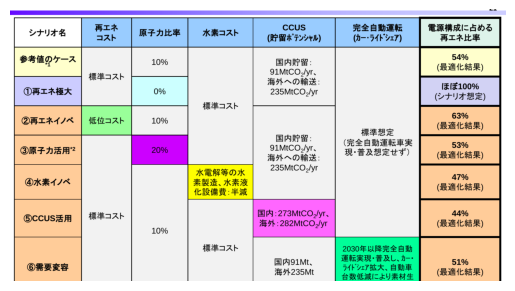

page:  0
distance:  0.2813679237265606
### Title

2050年カーボンニュートラルのシナリオ分析（中間報告）

### Content

- (公財)地球環境産業技術研究機構（RITE）のシステム研究グループによる2050年カーボンニュートラルのシナリオ分析の中間報告です。
- 秋元 圭吾氏と佐野 史典氏が担当しています。
- この報告は総合資源エネルギー調査会の基本政策分科会で発表されました。
- 発表日は2021年5月13日です。

### Description

- このスライドは2050年カーボンニュートラルのシナリオ分析の中間報告を示しています。
- 詳細な内容はスライドには記載されていません。

### Reference

- 電力系統の統合費用分析には日本エネルギー経済研究所の松尾雄司氏が協力しています。


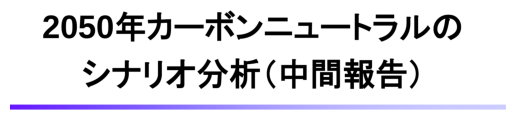

In [83]:
import glob
path = "/content/drive/MyDrive/data/043_005/"
for i in range(len(results["ids"][0])):
  idx = results["ids"][0][i]
  print("page: ", idx)
  print("distance: ", results["distances"][0][i])
  print(results["documents"][0][i])
  for img_path in glob.glob(path+f"page{idx}/*.png"):
    img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')  # 軸を非表示にする
  plt.show()


In [76]:
text_query = "再生可能エネルギーの普及率とその影響"
embeddings_query = embedding_function(text_query)
results = summary_collection.query(embeddings_query,
                                   n_results=5,
                                   include= ["documents", "metadatas", "distances"])

>

page:  45
distance:  0.30042396494750995
### Title

まとめ（暫定）

### Content

- 総発電: 46兆kWh
- 電力量: 
  - 再エネ: 1.05兆kWh (約100%)
  - 原子力: 0兆kWh
  - 水素: 0兆kWh
  - アンモニア: 0兆kWh
  - CCUS: 0兆kWh
  - 火力: 0兆kWh
- 電源構成: 
  - 再エネ: 約100%
  - 原子力: 0%
  - 水素: 0%
  - アンモニア: 0%
  - CCUS: 0%
  - 火力: 0%
- 結果からの示唆、結果を実現するための課題:
  - いずれの電源も導入に向けて、技術的、自然的・社会的、経済的な課題を全て乗り越える必要。
  - 様々な課題を乗りこえられることを想定して設定するシナリオ。
  - いずれの電源においても、この水準を達成することは容易ではない水準。

### Description

N/A

### Reference

N/A


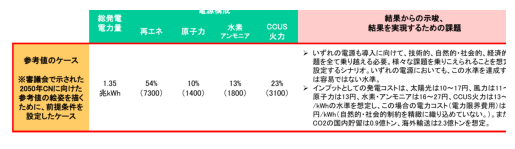

page:  3
distance:  0.3105688988678427
### Title

日本の正味ゼロ排出のイメージ（2/2）

### Content

- モデルでは、非電力部門も含めて全体システムとして分析されています。
- 発電電力量は、以下の要素によって決まります：
  - 社会構造変化によるエネルギー需要の変化（社会経済シナリオによるが基本的には減少）
  - エネルギー利用構造変化としての電力化率向上
  - 省電力による需要減少
  - 非電力需要の電化
  - VRE増加に伴う蓄電池等の電力貯蔵増によるロスの増加
  - グリーン水素・e-fuel（合成燃料）製造用電力需要の増加（ただし海外製造の場合、日本の電力需要増には寄与しない）

### Description

None

### Reference

出典）総合資源エネルギー調査会 基本政策分科会, 2020


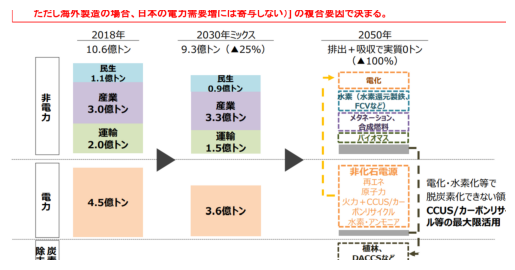

page:  47
distance:  0.31815924970256554
### Title

シナリオ分析の結果からの示唆

### Content

- 非電力部門については、水素還元製鉄やDACCSなどの炭素除去技術やカーボンリサイクル技術は必要不可欠な技術であり、これらの技術を実装できない限り、カーボンニュートラル社会の達成は困難である。
- 2050年カーボンニュートラルに向けては、確立した脱炭素技術のある電力部門の脱炭素化が大前提となる。しかし、電源ごとに課題や制約があり、これらを乗り越える前提条件を設定する必要がある。課題の克服には困難が伴い、電力コストも上昇する見込みである。
- 再エネ電源については、モデル分析上では導入量を増加させることが可能であるが、実際には自然条件や社会制約により、再エネ電源への依存度を高めることは困難であり、再エネ100%のシナリオは現実的ではない。また、再エネ100%にするとコストが大幅に上昇する。
- 技術イノベーションが進展するケースを比較すると、脱炭素電源ごとに課題が克服され、導入が拡大すれば、2050年カーボンニュートラルの実現可能性が高まる。しかし、課題の克服には不確実性が大きい。

### Description

なし

### Reference

なし


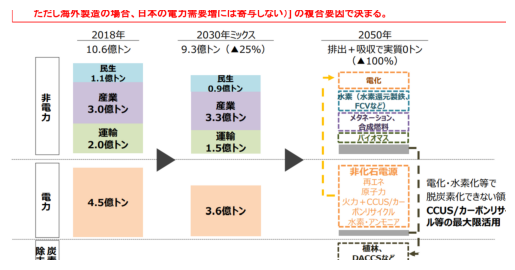

page:  6
distance:  0.3267151400471839
### Title

DNE21+のエネルギーフロー概略

### Content

- 化石エネルギー
  - 石炭（石炭、褐炭）
  - 石油（在来型、非在来型）
  - 天然ガス（在来型、非在来型）
  - 累積生産量
  - 生産
  - 単価
- 再生可能エネルギー
  - 水力・地熱
  - 風力（陸上・洋上）
  - 太陽光、集光型太陽熱
  - バイオマス・海洋ｴﾈﾙｷﾞｰ
  - 年間生産量
  - 供給
  - 単価
- 原子力
- 各種エネルギー変換プロセス
  - 石油精製
  - 石炭ガス化
  - ﾊﾞｲｵｴﾀﾉｰﾙ化
  - ガス改質
  - 水電解等
- 産業部門
  - 各種発電
  - CCUS
- 運輸部門
- 民生部門（業務・家庭）
- 鉄鋼
- セメント・ｺﾝｸﾘｰﾄ
- 紙パ
- 化学(ｴﾁﾚﾝ, ﾌﾟﾛﾋﾟﾚﾝ, ｱﾝﾓﾆｱ 等)
- アルミ
- 自動車、国際海運、航空
- 冷暖房、冷蔵庫、ﾃﾚﾋﾞ 他
- 固体、液体、気体燃料、電力
- 固体、液体、気体燃料、電力
- 固体、液体、気体燃料、電力
- 7
- ボトムアップ的にモデル化している主要な部門については、経済活動量やサービス需要を外生的に想定してモデルに入力する(例：粗鋼やセメント生産量、乗用車の旅客サービス需要等)。
- 温暖化対策を想定しないベースラインにおける化石燃料価格は外生的に想定し、生産単価や利権料等のその他価格要因を調整する。排出削減を想定したケースでは、それに伴う化石燃料利用量の変化に従って、モデルで内生的に価格が決定される。
- 各種技術の設備


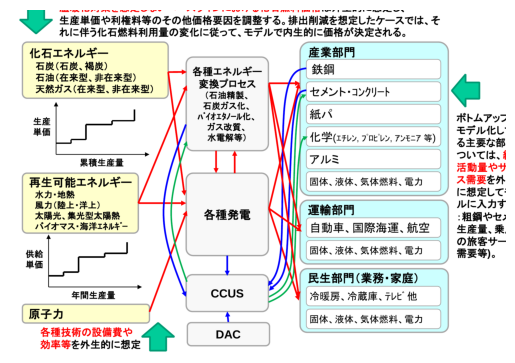

page:  21
distance:  0.3269602347985291
### Title

電源の参考値におけるイノベーションの考え方

### Content

- 2050年の電源の参考値を実現するためには、各電源がそれぞれ大きなハードルを乗り越える必要がある。
- 原子力と化石＋CCUSで3~4割について、原子力の上限を1割と想定した場合、化石＋CCUSで2~3割を満たす必要がある。
- 電力部門以外におけるCCUS必要量も含めて、相当量のCO2貯留を国内外で実現する想定となる。
- 水素・アンモニア・カーボンリサイクル燃料についても、モデル上供給上限は設定せず、大規模輸送を実現するインフラ整備等の実現を想定している。

### Description

- このスライドは、基本政策分科会において提示された、2050年の電源の参考値を実現するために必要なイノベーションの考え方を説明している。
- イノベーションの考え方は、各電源が大きなハードルを乗り越える必要があることを示している。
- 原子力と化石＋CCUSの割合を3~4割とし、原子力の上限を1割と想定した場合、化石＋CCUSで2~3割を満たす必要があることが示されている。
- また、電力部門以外におけるCCUS必要量も含めて、相当量のCO2貯留を国内外で実現する必要があることが述べられている。
- 水素・アンモニア・カーボンリサイクル燃料についても、モデル上供給上限は設定せず、大規模輸送を実現するインフラ整備等の実現を想定していることが説明されている。

### Reference

- 基本政策分科会資料(抜粋) - 令和2年12月21日


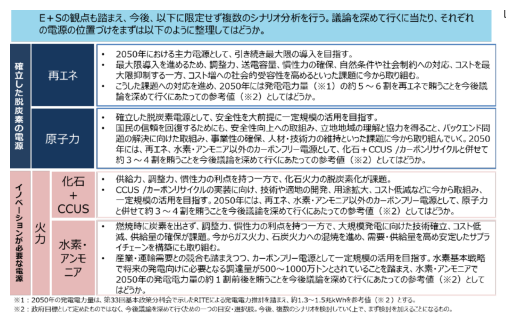

In [77]:
import glob
path = "/content/drive/MyDrive/data/043_005/"
for i in range(len(results["ids"][0])):
  idx = results["ids"][0][i]
  print("page: ", idx)
  print("distance: ", results["distances"][0][i])
  print(results["documents"][0][i])
  for img_path in glob.glob(path+f"page{idx}/*.png"):
    img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')  # 軸を非表示にする
  plt.show()


>page:  20
distance:  0.2328520878371206
### Title

シナリオ想定と再エネ比率 (2050年)

### Content

- シナリオ名: シナリオ想定と再エネ比率 (2050年)
- 再エネコスト: 再エネのコスト
- 原子力比率: 原子力の比率
- 水素コスト: 水素のコスト
- CCUS (貯留ポテンシャル): CCUSの貯留ポテンシャル
- 完全自動運転 (カーライドシェア): 完全自動運転とカーライドシェア
- 電源構成に占める再エネ比率: 電源構成に占める再エネの比率
- 参考値のケース: 参考値のケース
- 標準コスト: 標準のコスト
- 国内貯留: 国内への貯留
- 海外への輸送: 海外への輸送
- 標準想定 (完全自動運転車実現・普及想定せず): 標準の想定 (完全自動運転車実現・普及想定せず)
- 再エネ極大: 再エネの極大
- 再エネイノベ: 再エネのイノベ
- 低位コスト: 低位のコスト
- 原子力活用: 原子力の活用
- 水素イノベ: 水素のイノベ
- CCUS活用: CCUSの活用
- 需要変容: 需要の変容
- 2030年以降完全自動運転実現・普及し、カーライドシェア拡大、自動車台数低減により素材生産量低下: 2030年以降完全自動運転実現・普及し、カーライドシェア拡大、自動車台数低減により素材生産量低下
- DAC無しでは実行可能解が無く、全てのシナリオでDACが利用可能と想定: DAC無しでは実行可能解が無く、全てのシナリオでDACが利用可能と想定
- 原子力活用シナリオは別途、比率50%まで分析を実施: 原子力活用シナリオは別途、比率50%まで分析を実施
- 需要サイドの変化については、カーシェアリング以外の要素も踏まえた更なるシナリオ


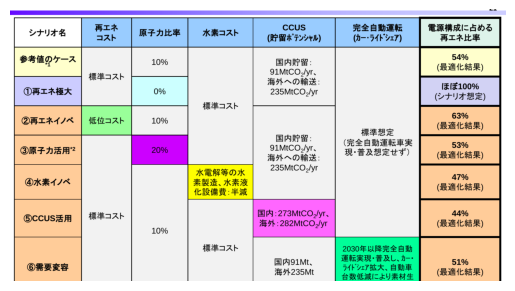

page:  47
distance:  0.23764974098317324
### Title

シナリオ分析の結果からの示唆

### Content

- 非電力部門については、水素還元製鉄やDACCSなどの炭素除去技術やカーボンリサイクル技術は必要不可欠な技術であり、これらの技術を実装できない限り、カーボンニュートラル社会の達成は困難である。
- 2050年カーボンニュートラルに向けては、確立した脱炭素技術のある電力部門の脱炭素化が大前提となる。しかし、電源ごとに課題や制約があり、これらを乗り越える前提条件を設定する必要がある。課題の克服には困難が伴い、電力コストも上昇する見込みである。
- 再エネ電源については、モデル分析上では導入量を増加させることが可能であるが、実際には自然条件や社会制約により、再エネ電源への依存度を高めることは困難であり、再エネ100%のシナリオは現実的ではない。また、再エネ100%にするとコストが大幅に上昇する。
- 技術イノベーションが進展するケースを比較すると、脱炭素電源ごとに課題が克服され、導入が拡大すれば、2050年カーボンニュートラルの実現可能性が高まる。しかし、課題の克服には不確実性が大きい。

### Description

なし

### Reference

なし


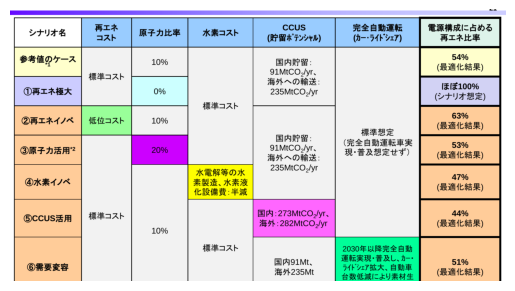

page:  45
distance:  0.2542692155105238
### Title

まとめ（暫定）

### Content

- 総発電: 46兆kWh
- 電力量: 
  - 再エネ: 1.05兆kWh (約100%)
  - 原子力: 0兆kWh
  - 水素: 0兆kWh
  - アンモニア: 0兆kWh
  - CCUS: 0兆kWh
  - 火力: 0兆kWh
- 電源構成: 
  - 再エネ: 約100%
  - 原子力: 0%
  - 水素: 0%
  - アンモニア: 0%
  - CCUS: 0%
  - 火力: 0%
- 結果からの示唆、結果を実現するための課題:
  - いずれの電源も導入に向けて、技術的、自然的・社会的、経済的な課題を全て乗り越える必要。
  - 様々な課題を乗りこえられることを想定して設定するシナリオ。
  - いずれの電源においても、この水準を達成することは容易ではない水準。

### Description

N/A

### Reference

N/A


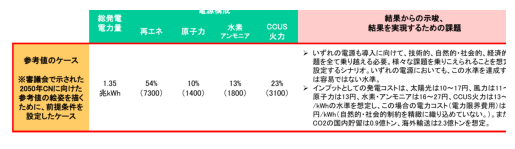

page:  0
distance:  0.2599203846470436
### Title

2050年カーボンニュートラルのシナリオ分析（中間報告）

### Content

- (公財)地球環境産業技術研究機構（RITE）のシステム研究グループによる2050年カーボンニュートラルのシナリオ分析の中間報告です。
- 秋元 圭吾氏と佐野 史典氏が担当しています。
- この報告は総合資源エネルギー調査会の基本政策分科会で発表されました。
- 発表日は2021年5月13日です。

### Description

- このスライドは2050年カーボンニュートラルのシナリオ分析の中間報告を示しています。
- 詳細な内容はスライドには記載されていません。

### Reference

- 電力系統の統合費用分析には日本エネルギー経済研究所の松尾雄司氏が協力しています。


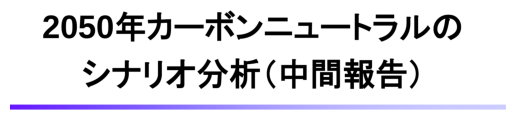

page:  15
distance:  0.27388568316438516
### Title

シナリオ想定（概略）

### Content

- 2050年GHG排出削減のためのシナリオ想定
- 各種技術の想定（コスト・性能）
- 各種技術の導入シナリオ
- 参考値のケース
  - 日本以外については、欧米はそれぞれ▲100%、それ以外は、全体で▲100%を想定
- モデルの標準想定
  - 再エネ比率が高いシナリオでは、疑似慣性力が実現し、普及していることが暗黙の前提となる
- モデルで内生的に決定（コスト最小化）
  - 原子力は上限10%で制約
  - CO2貯留量制約想定
- 参考値のケースのモデル想定下で再エネ比率が変化した場合のコスト等を推計

### Description

N/A

### Reference

N/A


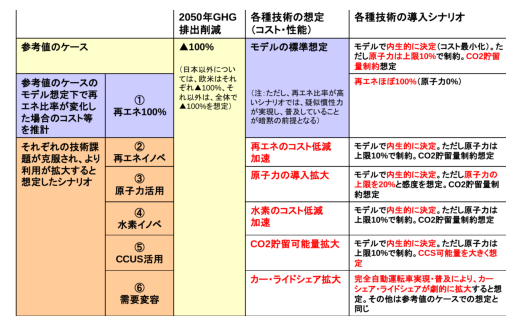

In [75]:
text_query = "2050年CN達成時の発電電力構成についてのシナリオ"
keyword = "シナリオ"
embeddings_query = embedding_function(text_query)
results = summary_collection.query(embeddings_query,
                                   where_document={"$contains":keyword},
                                   n_results=5,
                                   include= ["documents", "metadatas", "distances"])

for i in range(len(results["ids"][0])):
  idx = results["ids"][0][i]
  print("page: ", idx)
  print("distance: ", results["distances"][0][i])
  print(results["documents"][0][i])
  for img_path in glob.glob(path+f"page{idx}/*.png"):
    img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('off')  # 軸を非表示にする
  plt.show()


Langchian でQAChainを構築

In [43]:
!pip install langchain tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


In [46]:
from langchain.embeddings import AzureOpenAIEmbeddings
EMBEDDING_MODEL = "text-embedding-ada-002"
embeddings = AzureOpenAIEmbeddings(
    azure_deployment=EMBEDDING_MODEL,
    openai_api_version=os.environ.get("OPENAI_API_VERSION")
)

In [66]:
from langchain.document_loaders import DataFrameLoader

loader = DataFrameLoader(combined_df.loc[:,['title', 'text_pymupdf', 'text_lp', 'text_summarized']], page_content_column="text_summarized")
docs = loader.load()
doc_embs = combined_df["embeddings_text_summarized"].to_list()

db2 = Chroma.from_documents(docs, embedding=embeddings, persist_directory="/content/drive/MyDrive/data/043_005/langchain_chroma_db")

In [47]:
text = "this is a test document"
query_result = embeddings.embed_query(text)

In [48]:
# import
from langchain.document_loaders import TextLoader
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

In [51]:
db = Chroma(persist_directory="/content/drive/MyDrive/data/043_005/chromadb", embedding_function=embeddings)


In [67]:
query = "発電"
docs = db2.similarity_search(query)
print(docs[0].page_content)

### Title

まとめ（暫定）

### Content

- 総発電: 46兆kWh
- 電力量: 
  - 再エネ: 1.05兆kWh (約100%)
  - 原子力: 0兆kWh
  - 水素: 0兆kWh
  - アンモニア: 0兆kWh
  - CCUS: 0兆kWh
  - 火力: 0兆kWh
- 電源構成: 
  - 再エネ: 約100%
  - 原子力: 0%
  - 水素: 0%
  - アンモニア: 0%
  - CCUS: 0%
  - 火力: 0%
- 結果からの示唆、結果を実現するための課題:
  - いずれの電源も導入に向けて、技術的、自然的・社会的、経済的な課題を全て乗り越える必要。
  - 様々な課題を乗りこえられることを想定して設定するシナリオ。
  - いずれの電源においても、この水準を達成することは容易ではない水準。

### Description

N/A

### Reference

N/A


In [57]:
from langchain.chains.question_answering import load_qa_chain
llm = A
chain = load_qa_chain(llm, chain_type="stuff")
chain.run(input_documents=docs, question=query)

ValueError: ignored